<a href="https://colab.research.google.com/github/everestso/Spring2021/blob/main/s21DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Examples

In [ ]:
# Common imports
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

import math

In [ ]:
# Common imports
import os
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Define Entropy Function

$Entropy(x) = -\sum_{i=1}^n  p(x_i) \log_2p(x_i)$

In [ ]:
def safelog2b(x):
  if not x:
    return x 
  else:
    return math.log2(x)

safelog2 = lambda x: 0 if x==0 else math.log2(x)

def Entropy(setElementCounts):
  totalCounts = sum(setElementCounts)
  probabilities = [i/totalCounts for i in setElementCounts]
  entropyOfSetIntermediate = [-p*safelog2(p) for p in probabilities]
  print ("Probabilities=", probabilities)
  print (entropyOfSetIntermediate)
  return sum(entropyOfSetIntermediate)

# Define Gini

$Gini(x) = -\sum_{i=1}^n  p(x_i) (1-p(x_i))$

In [ ]:
def Gini(setElementCounts):
  totalCounts = sum(setElementCounts)
  probabilities = [i/totalCounts for i in setElementCounts]
  entropyOfSetIntermediate = [p*(1-p) for p in probabilities]
  print (entropyOfSetIntermediate)
  return sum(entropyOfSetIntermediate)

# Decision Tree: Example One

https://aimacode.github.io/aima-exercises/concept-learning-exercises/

Exercise 8

In [ ]:
datasetsDir = "/content/gdrive/My Drive/csuf/S20/Resources/Datasets/"
csv_path = os.path.join(datasetsDir, "MlSimpleTest1 - Sheet4.csv")
data = pd.read_csv(csv_path)
print(data)

   y  A1  A2  A3
0  0   1   0   0
1  0   1   0   1
2  0   0   1   0
3  1   1   1   1
4  1   1   1   0


In [ ]:
# Alternate Data  Load
dataRaw = [
[ 0 , 1 , 0 , 0 ],
[ 0 , 1 , 0 , 1 ],
[ 0 , 0 , 1 , 0 ],
[ 1 , 1 , 1 , 1 ],
[ 1 , 1 , 1 , 0 ]
]

print (dataRaw)
data = pd.DataFrame(dataRaw, columns=['y', 'A1', 'A2', 'A3'])
print (data)

[[0, 1, 0, 0], [0, 1, 0, 1], [0, 0, 1, 0], [1, 1, 1, 1], [1, 1, 1, 0]]
   y  A1  A2  A3
0  0   1   0   0
1  0   1   0   1
2  0   0   1   0
3  1   1   1   1
4  1   1   1   0


In [ ]:
# Original set consists of 3 0's (negative) and 2 1's (positive)
print (Entropy([3,2]))

Probabilities= [0.6, 0.4]
[0.44217935649972373, 0.5287712379549449]
0.9709505944546686


In [ ]:
for (_, y, A1, A2, A3) in data.itertuples(name=None):
  print (y, A1, A2, A3)

0 1 0 0
0 1 0 1
0 0 1 0
1 1 1 1
1 1 1 0


In [ ]:
X = data.drop("y", axis=1)
Y=data['y'].values

classifier1 = DecisionTreeClassifier(criterion="gini")
classifier2 = DecisionTreeClassifier(criterion="entropy")
classifier1.fit(X,Y)
classifier2.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

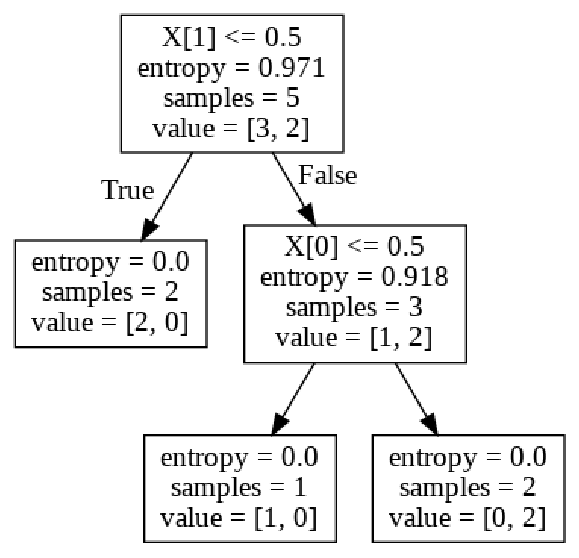

In [ ]:
from sklearn import tree

import matplotlib.image as mpimg
import pydotplus

dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(classifier2, out_file = dotfile)
dotfile.close()
graph = pydotplus.graph_from_dot_file("dtree2.dot")
graph.write_png('test.png')
img=mpimg.imread('test.png')
fig = plt.figure(figsize=(30, 10)) 
plt.axis("off")
plt.imshow(img, cmap = plt.cm.binary,
           interpolation="nearest")
plt.show()

# Decision Tree: Example Two

In [ ]:
# load data
iris = load_iris()
print( iris.data.shape )

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']

print(df.describe())
print(df.head(4))

(150, 4)
       sepal length (cm)  sepal width (cm)  ...  petal width (cm)      target
count         150.000000        150.000000  ...        150.000000  150.000000
mean            5.843333          3.057333  ...          1.199333    1.000000
std             0.828066          0.435866  ...          0.762238    0.819232
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.800000          3.000000  ...          1.300000    1.000000
75%             6.400000          3.300000  ...          1.800000    2.000000
max             7.900000          4.400000  ...          2.500000    2.000000

[8 rows x 5 columns]
   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
0                5.1               3.5  ...               0.2       0
1                4.9               3.0  ...               0.2       0
2                4.7               3.2  ...              

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print(train_set.describe())
print( "\nTraining Percentages:\n" )
print(train_set.count()/df.count())

       sepal length (cm)  sepal width (cm)  ...  petal width (cm)      target
count         120.000000        120.000000  ...        120.000000  120.000000
mean            5.809167          3.061667  ...          1.183333    0.991667
std             0.823805          0.449123  ...          0.752289    0.814736
min             4.300000          2.000000  ...          0.100000    0.000000
25%             5.100000          2.800000  ...          0.300000    0.000000
50%             5.750000          3.000000  ...          1.300000    1.000000
75%             6.400000          3.400000  ...          1.800000    2.000000
max             7.700000          4.400000  ...          2.500000    2.000000

[8 rows x 5 columns]

Training Percentages:

sepal length (cm)    0.8
sepal width (cm)     0.8
petal length (cm)    0.8
petal width (cm)     0.8
target               0.8
dtype: float64


In [ ]:
X = train_set.drop("target", axis=1) # drop labels for training set
Y = train_set['target'].copy()

classifier1 = DecisionTreeClassifier(max_depth=3, criterion="gini")
classifier2 = DecisionTreeClassifier(max_depth=3, criterion="entropy")
classifier1.fit(X,Y)
y_pred1 = classifier1.predict(X)
print ("Accuracy on Training (gini): ",sum(y_pred1==Y)/len(Y))

classifier2.fit(X,Y)
y_pred2 = classifier2.predict(X)
print ("Accuracy on Training (entropy): ",sum(y_pred2==Y)/len(Y))

Accuracy on Training (gini):  0.9583333333333334
Accuracy on Training (entropy):  0.9583333333333334


In [ ]:
X = test_set.drop("target", axis=1) # drop labels for training set
Y = test_set['target'].copy()

y_pred1 = classifier1.predict(X)
print ("Accuracy on Test Set (gini): ",sum(y_pred1==Y)/len(Y))
y_pred2 = classifier2.predict(X)
print ("Accuracy on Test Set (entropy): ",sum(y_pred2==Y)/len(Y))

Accuracy on Test Set (gini):  1.0
Accuracy on Test Set (entropy):  1.0


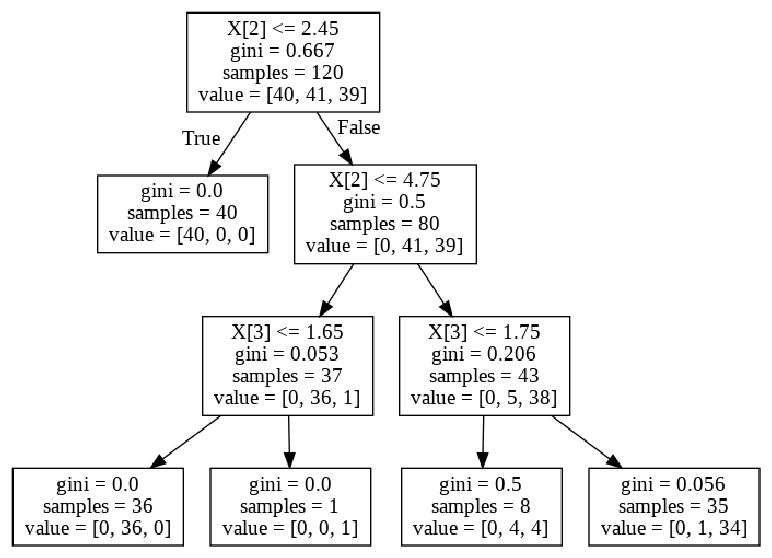

In [ ]:
dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(classifier1, out_file = dotfile)
dotfile.close()
graph = pydotplus.graph_from_dot_file("dtree2.dot")
graph.write_png('test.png')
img=mpimg.imread('test.png')
fig = plt.figure(figsize=(30, 10)) 
plt.axis("off")
plt.imshow(img, cmap = plt.cm.binary,
           interpolation="nearest")
plt.show()

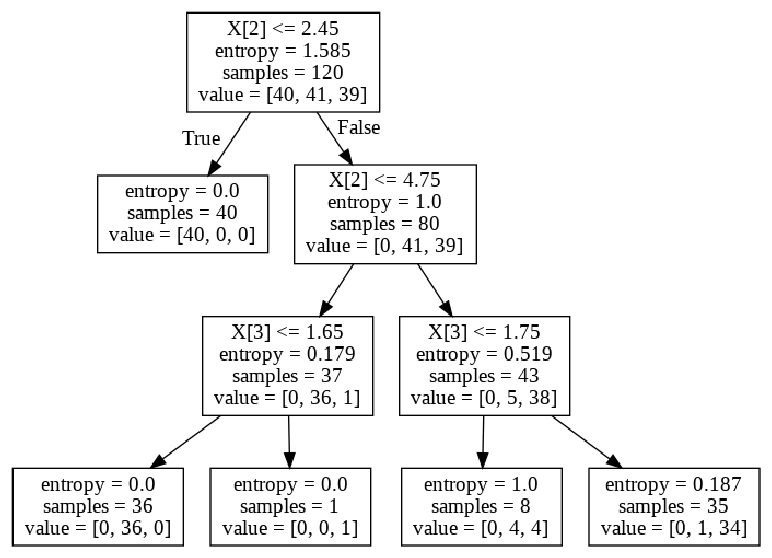

In [ ]:
dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(classifier2, out_file = dotfile)
dotfile.close()
graph = pydotplus.graph_from_dot_file("dtree2.dot")
graph.write_png('test.png')
img=mpimg.imread('test.png')
fig = plt.figure(figsize=(30, 10)) 
plt.axis("off")
plt.imshow(img, cmap = plt.cm.binary,
           interpolation="nearest")
plt.show()

# Class Example

In [ ]:
e = -1*((3/5)*math.log2(3/5) + 2/5*math.log2(2/5))
print("Initial Entropy", e)

## Splitting on A1
#### A1 = 0, mixture [1.0, 0], 1/5 examples
###  A1 = 1, mixture [0.5, 0.5], 4/5 examples

### Split Entropy = 1/5*Entropy[1.0,0] + 4/5*Entropy[0.5,0,5]
###### 1/5*0 + 4/5 = 4/5 = 0.8

### Split on A2
#### A2 = 0, mixture [1, 0], 2/5 examples
###  A2 = 1, mixture [1/3, 2/3], 3/5 examples

a2={}
a2[0] = 0.0 # Pure Mixture
a2[1] = -1*( 1/3*math.log2(1/3) + 2/3*math.log2(2/3))
print (a2)
print (2/5*a2[0] + 3/5*a2[1])

print ("IG w/ A1=", e - 0.8)
print ("IG w/ A2=", e - (2/5*a2[0] + 3/5*a2[1]))

Initial Entropy 0.9709505944546686
{0: 0.0, 1: 0.9182958340544896}
0.5509775004326937
IG w/ A1= 0.17095059445466854
IG w/ A2= 0.4199730940219749


In [ ]:
left = data.loc[data['A1'] == 0]
right = data.loc[data['A1'] == 1]

print ("A1=0")
print (left)
print ("A1=1")
print (right)

A1=0
   y  A1  A2  A3
2  0   0   1   0
A1=1
   y  A1  A2  A3
0  0   1   0   0
1  0   1   0   1
3  1   1   1   1
4  1   1   1   0


# Example 3

In [ ]:
dataURL = "https://raw.githubusercontent.com/aimacode/aima-data/master/restaurant.csv"

pd.set_option("max_columns", None) # show all cols
pd.set_option('max_colwidth', None) # show full width of showing cols
pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be

restaurantData = pd.read_csv(dataURL, names=["alt", "bar", "Fri", "Hun", "Pat", "Price", "Rain", "Res", "Type", "Est", "WillWait"])
print(restaurantData)

    alt    bar    Fri    Hun     Pat Price    Rain     Res      Type        Est WillWait
0   Yes     No     No    Yes    Some   $$$      No     Yes    French       0-10      Yes
1   Yes     No     No    Yes    Full     $      No      No      Thai      30-60       No
2    No    Yes     No     No    Some     $      No      No    Burger       0-10      Yes
3   Yes     No    Yes    Yes    Full     $      No      No      Thai      10-30      Yes
4   Yes     No    Yes     No    Full   $$$      No     Yes    French        >60      No 
5    No    Yes     No    Yes    Some    $$     Yes     Yes   Italian       0-10      Yes
6    No    Yes     No     No    None     $     Yes      No    Burger       0-10       No
7    No     No     No    Yes    Some    $$     Yes     Yes      Thai       0-10      Yes
8    No    Yes    Yes     No    Full     $     Yes      No    Burger        >60      No 
9   Yes    Yes    Yes    Yes    Full   $$$      No     Yes   Italian      10-30      No 
10   No     No     No

In [ ]:
x={'No':0,'Yes':1}
y={'None':0, 'Some':1, 'Full':2}
z={'$':0, "$$":1, "$$$":2}
typeMap={"French":0, "Thai":1, "Burger": 2, "Italian":3}
estMap = {"0-10":0, "10-30":1, "30-60": 2, ">60":3}
f = lambda v: x[v]
df = restaurantData.copy()
df['alt']=df['alt'].apply(f)
df['bar']=df['bar'].str.strip().apply(f)
df['Fri']=df['Fri'].str.strip().map(x)
df['Hun']=df['Hun'].str.strip().map(x)
df['Pat']=df['Pat'].str.strip().map(y)
df['Price']=df['Price'].str.strip().map(z)
df['Rain']=df['Rain'].str.strip().map(x)
df['Res']=df['Res'].str.strip().map(x)
df['Type']=df['Type'].str.strip().map(typeMap)
df['Est']=df['Est'].str.strip().map(estMap)
df['WillWait']=df['WillWait'].str.strip().map(x)




print(df)


    alt  bar  Fri  Hun  Pat  Price  Rain  Res  Type  Est  WillWait
0     1    0    0    1    1      2     0    1     0    0         1
1     1    0    0    1    2      0     0    0     1    2         0
2     0    1    0    0    1      0     0    0     2    0         1
3     1    0    1    1    2      0     0    0     1    1         1
4     1    0    1    0    2      2     0    1     0    3         0
5     0    1    0    1    1      1     1    1     3    0         1
6     0    1    0    0    0      0     1    0     2    0         0
7     0    0    0    1    1      1     1    1     1    0         1
8     0    1    1    0    2      0     1    0     2    3         0
9     1    1    1    1    2      2     0    1     3    1         0
10    0    0    0    0    0      0     0    0     1    0         0
11    1    1    1    1    2      0     0    0     2    2         1


In [ ]:
X = df.drop("WillWait", axis=1) # drop labels for training set
Y = df['WillWait'].copy()

In [ ]:
classifier1 = DecisionTreeClassifier(max_depth=3, criterion="gini")
classifier2 = DecisionTreeClassifier(max_depth=3, criterion="entropy")
classifier1.fit(X,Y)
y_pred1 = classifier1.predict(X)
print ("Accuracy on Training (gini): ",sum(y_pred1==Y)/len(Y))

classifier2.fit(X,Y)
y_pred2 = classifier2.predict(X)
print ("Accuracy on Training (entropy): ",sum(y_pred2==Y)/len(Y))

Accuracy on Training (gini):  0.9166666666666666
Accuracy on Training (entropy):  0.9166666666666666


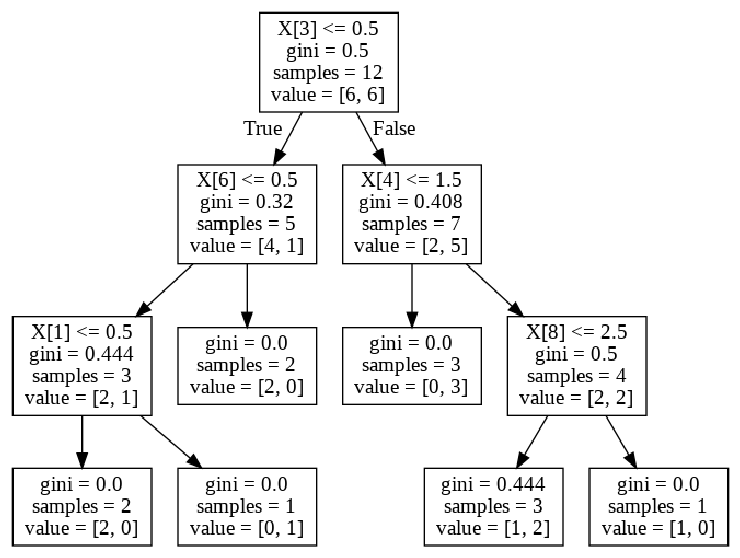

In [ ]:

dotfile = open("dtree2.dot", 'w')
tree.export_graphviz(classifier1, out_file = dotfile)
dotfile.close()
graph = pydotplus.graph_from_dot_file("dtree2.dot")
graph.write_png('test.png')
img=mpimg.imread('test.png')
fig = plt.figure(figsize=(30, 10)) 
plt.axis("off")
plt.imshow(img, cmap = plt.cm.binary,
           interpolation="nearest")
plt.show()

In [ ]:
for i, e in enumerate(df.columns):
  print (i,e)

0 alt
1 bar
2 Fri
3 Hun
4 Pat
5 Price
6 Rain
7 Res
8 Type
9 Est
10 WillWait


# More Class Examples

In [ ]:
##### 